# 📊 Portfolio Analysis - Monte Carlo Simulation

**Complete analysis including:**
- Historical performance
- Monte Carlo simulations
- Risk analysis
- Visualizations

---

## 1️⃣ Setup & Configuration

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Para mostrar gráficos en Jupyter
%matplotlib inline

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

print("✓ Setup completado")

✓ Setup completado


## 2️⃣ Execute Complete Analysis

**This will run all phases:**
1. Data extraction
2. Data cleaning & validation
3. Statistical analysis
4. Monte Carlo simulations

In [2]:
# Execute complete analysis
from run_complete_analysis import main

print("🚀 Ejecutando análisis completo...")
print("⚠️  Esto puede tomar varios minutos...\n")

outputs = main()

# Extract results
portfolio = outputs['portfolio']
results = outputs['mc_results']

print("\n✓ Análisis completo finalizado")
print(f"Portfolio: {len(portfolio.assets)} activos")
print(f"Simulaciones: {results.parameters['n_simulations']:,}")

/Users/eduardogonzalezarroyo/Desktop/Material MIAX/Prácticas Entregables/01-MarketData_Extractor-Portfolio_Analysis/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2025-11-07 12:13:05,304 - run_complete_analysis - INFO - 
2025-11-07 12:13:05,304 - run_complete_analysis - INFO -                     ANÁLISIS COMPLETO DE PORTFOLIO
2025-11-07 12:13:05,305 - run_complete_analysis - INFO - ================================================================================
2025-11-07 12:13:05,305 - run_complete_analysis - INFO - 
Fecha: 2025-11-07 12:13:05
2025-11-07 12:13:05,305 - run_complete_analysis - INFO - Periodo: 2018-01-02 a 2025-10-01
2025-11-07 12:13:05,306 - run_complete_analysis - INFO - Activos: AAPL, MSFT, GOOGL, AMZN, TSLA, NVDA, JPM, JNJ, PG, KO, XOM, MCD
2025-11-07 12:13:05,306 -

🚀 Ejecutando análisis completo...
⚠️  Esto puede tomar varios minutos...



2025-11-07 12:13:05,830 - YahooExtractor - INFO - ✓ AAPL descargado correctamente (1947 registros)
2025-11-07 12:13:05,830 - YahooExtractor - INFO - Descargando MSFT desde Yahoo Finance...
2025-11-07 12:13:06,068 - YahooExtractor - INFO - ✓ MSFT descargado correctamente (1947 registros)
2025-11-07 12:13:06,069 - YahooExtractor - INFO - Descargando GOOGL desde Yahoo Finance...
2025-11-07 12:13:06,247 - YahooExtractor - INFO - ✓ GOOGL descargado correctamente (1947 registros)
2025-11-07 12:13:06,248 - YahooExtractor - INFO - Descargando AMZN desde Yahoo Finance...
2025-11-07 12:13:06,471 - YahooExtractor - INFO - ✓ AMZN descargado correctamente (1947 registros)
2025-11-07 12:13:06,471 - YahooExtractor - INFO - Descargando TSLA desde Yahoo Finance...
2025-11-07 12:13:06,652 - YahooExtractor - INFO - ✓ TSLA descargado correctamente (1947 registros)
2025-11-07 12:13:06,653 - YahooExtractor - INFO - Descargando NVDA desde Yahoo Finance...
2025-11-07 12:13:06,830 - YahooExtractor - INFO - ✓ N


✓ Análisis completo finalizado
Portfolio: 12 activos
Simulaciones: 10,000


## 3️⃣ Portfolio Overview

In [3]:
# Display portfolio information
print("📊 PORTFOLIO OVERVIEW")
print("=" * 60)

print(f"\n📅 Period: {results.parameters['start_date']} to {results.parameters['end_date']}")
print(f"🎯 Number of Assets: {len(portfolio.assets)}")
print(f"💰 Investment Strategy: Equal-weighted (Buy and Hold)")

print("\n📈 Assets:")
for ticker, weight in portfolio.weights.items():
    print(f"  {ticker}: {weight*100:.2f}%")

📊 PORTFOLIO OVERVIEW

📅 Period: 2018-01-02 to 2025-09-30
🎯 Number of Assets: 12
💰 Investment Strategy: Equal-weighted (Buy and Hold)

📈 Assets:
  AAPL: 8.33%
  MSFT: 8.33%
  GOOGL: 8.33%
  AMZN: 8.33%
  TSLA: 8.33%
  NVDA: 8.33%
  JPM: 8.33%
  JNJ: 8.33%
  PG: 8.33%
  KO: 8.33%
  XOM: 8.33%
  MCD: 8.33%


## 4️⃣ Historical Performance

In [4]:
# Calculate historical metrics
portfolio_returns = portfolio.get_portfolio_returns()
total_return = ((portfolio_returns + 1).prod() - 1) * 100
n_days = len(portfolio_returns)
n_years = n_days / 252
annualized_return = ((1 + total_return/100) ** (1/n_years) - 1) * 100
hist_volatility = portfolio_returns.std() * np.sqrt(252) * 100

# Maximum Drawdown
cumulative = (1 + portfolio_returns).cumprod()
running_max = cumulative.expanding().max()
drawdown = (cumulative - running_max) / running_max
max_drawdown = drawdown.min() * 100

print("📊 HISTORICAL PERFORMANCE")
print("=" * 60)
print(f"\n✓ Total Return: {total_return:.2f}%")
print(f"✓ Annualized Return: {annualized_return:.2f}%")
print(f"✓ Historical Volatility: {hist_volatility:.2f}%")
print(f"✓ Maximum Drawdown: {max_drawdown:.2f}%")
print(f"✓ Analysis Period: {n_years:.2f} years ({n_days} days)")

📊 HISTORICAL PERFORMANCE

✓ Total Return: 481.08%
✓ Annualized Return: 25.59%
✓ Historical Volatility: 21.11%
✓ Maximum Drawdown: -33.18%
✓ Analysis Period: 7.72 years (1946 days)


## 5️⃣ Monte Carlo Results

In [6]:
# Display Monte Carlo results
stats = results.portfolio_results.statistics

print("🎲 MONTE CARLO SIMULATION RESULTS")
print("=" * 60)

print(f"\n📈 Expected Outcomes:")
print(f"  Expected Final Value: ${stats['expected_value']:,.2f}")
print(f"  Expected Return: {stats['expected_return']:.2f}%")
print(f"  Standard Deviation: {stats['std_return']:.2f}%")

print(f"\n⚠️ Risk Metrics:")
print(f"  VaR (95%): ${abs(stats['var_95']):,.2f}")
print(f"  CVaR (95%): ${abs(stats['cvar_95']):,.2f}")
print(f"  Probability of Loss: {stats['prob_loss']:.2f}%")

print(f"\n📊 Scenario Analysis:")
perc = results.portfolio_results.percentiles
print(f"  Best Case (P95): ${perc['p95']:,.2f}")
print(f"  Expected (P50): ${perc['p50']:,.2f}")
print(f"  Worst Case (P5): ${perc['p5']:,.2f}")

🎲 MONTE CARLO SIMULATION RESULTS

📈 Expected Outcomes:
  Expected Final Value: $129,616.02
  Expected Return: 29.62%
  Standard Deviation: 30.39%

⚠️ Risk Metrics:
  VaR (95%): $87,939.94
  CVaR (95%): $81,166.32
  Probability of Loss: 14.75%

📊 Scenario Analysis:
  Best Case (P95): $185,696.67
  Expected (P50): $125,727.68
  Worst Case (P5): $87,939.94


## 6️⃣ Weight Drift Analysis

In [7]:
# Display weight drift
drift_df = results.get_weight_drift_dataframe()

if not drift_df.empty:
    print("⚖️ WEIGHT DRIFT ANALYSIS (Buy and Hold)")
    print("=" * 60)
    print("\nInitial vs Final Weights:")
    print(drift_df.to_string(index=False))
    
    drift = results.metadata['weight_drift_analysis']
    print(f"\nTotal Drift Magnitude: {drift['drift_magnitude']*100:.2f}%")

⚖️ WEIGHT DRIFT ANALYSIS (Buy and Hold)

Initial vs Final Weights:
Ticker  Initial_Weight_%  Final_Weight_%  Change_%  Change_pp
  AAPL          8.333333        8.559099  0.225766   0.225766
  MSFT          8.333333        8.533911  0.200578   0.200578
 GOOGL          8.333333        8.203955 -0.129378  -0.129378
  AMZN          8.333333        8.131412 -0.201922  -0.201922
  TSLA          8.333333       11.142573  2.809239   2.809239
  NVDA          8.333333       11.402858  3.069525   3.069525
   JPM          8.333333        7.948937 -0.384397  -0.384397
   JNJ          8.333333        7.046243 -1.287090  -1.287090
    PG          8.333333        7.266201 -1.067132  -1.067132
    KO          8.333333        7.134487 -1.198847  -1.198847
   XOM          8.333333        7.346608 -0.986725  -0.986725
   MCD          8.333333        7.283716 -1.049617  -1.049617

Total Drift Magnitude: 12.61%


## 7️⃣ Generate Markdown Report

In [8]:
# Generate comprehensive Markdown report
print("📝 Generando reporte Markdown...")

report = results.report(
    save_to_file=True,
    include_warnings=True,
    verbose=True
)

print("\n✓ Reporte generado exitosamente")
print("\n📄 Primeras líneas del reporte:")
print("=" * 60)
print(report[:500] + "...")

2025-11-07 12:16:42,916 - price_series - INFO -   ✓ Betas calculados vs índice de mercado
2025-11-07 12:16:42,918 - monte_carlo - INFO - 
✓ Reporte guardado en: portfolio_report_20251107_121642.md


📝 Generando reporte Markdown...

✓ Reporte generado exitosamente

📄 Primeras líneas del reporte:
# 📊 PORTFOLIO ANALYSIS REPORT

**Generated:** 2025-11-07 12:16:42
**Analysis Period:** 2018-01-02 to 2025-09-30

---

## 📋 Executive Summary

- **Portfolio Expected Return:** 29.62% annualized
- **Portfolio Volatility:** 30.39% annualized
- **Sharpe Ratio:** 0.892
- **Value at Risk (95%):** $87,939.94
- **Number of Assets:** 12
- **Weight Drift Magnitude:** 12.61% (Buy and Hold strategy)

---

## 📈 Portfolio Overview

**Period Analyzed:** 2018-01-02 to 2025-09-30
**Number of Assets:** 12
**Inves...


## 8️⃣ Generate All Visualizations

**This will create 9 comprehensive visualizations:**
1. Dashboard Ejecutivo
2. Evolución de Precios Históricos
3. Trayectorias Monte Carlo (Fan Chart)
4. Distribución de Valores Finales
5. Drift de Pesos
6. Heatmap de Correlaciones
7. Riesgo-Retorno Scatter
8. Tabla Comparativa
9. Maximum Drawdown

2025-11-07 12:16:50,464 - monte_carlo - INFO - 
2025-11-07 12:16:50,465 - monte_carlo - INFO - GENERANDO VISUALIZACIONES
2025-11-07 12:16:50,465 - monte_carlo - INFO - ============================================================
2025-11-07 12:16:50,466 - monte_carlo - INFO - 
[1/10] Dashboard Ejecutivo...


📊 Generando visualizaciones...
⚠️  Esto puede tomar un momento...



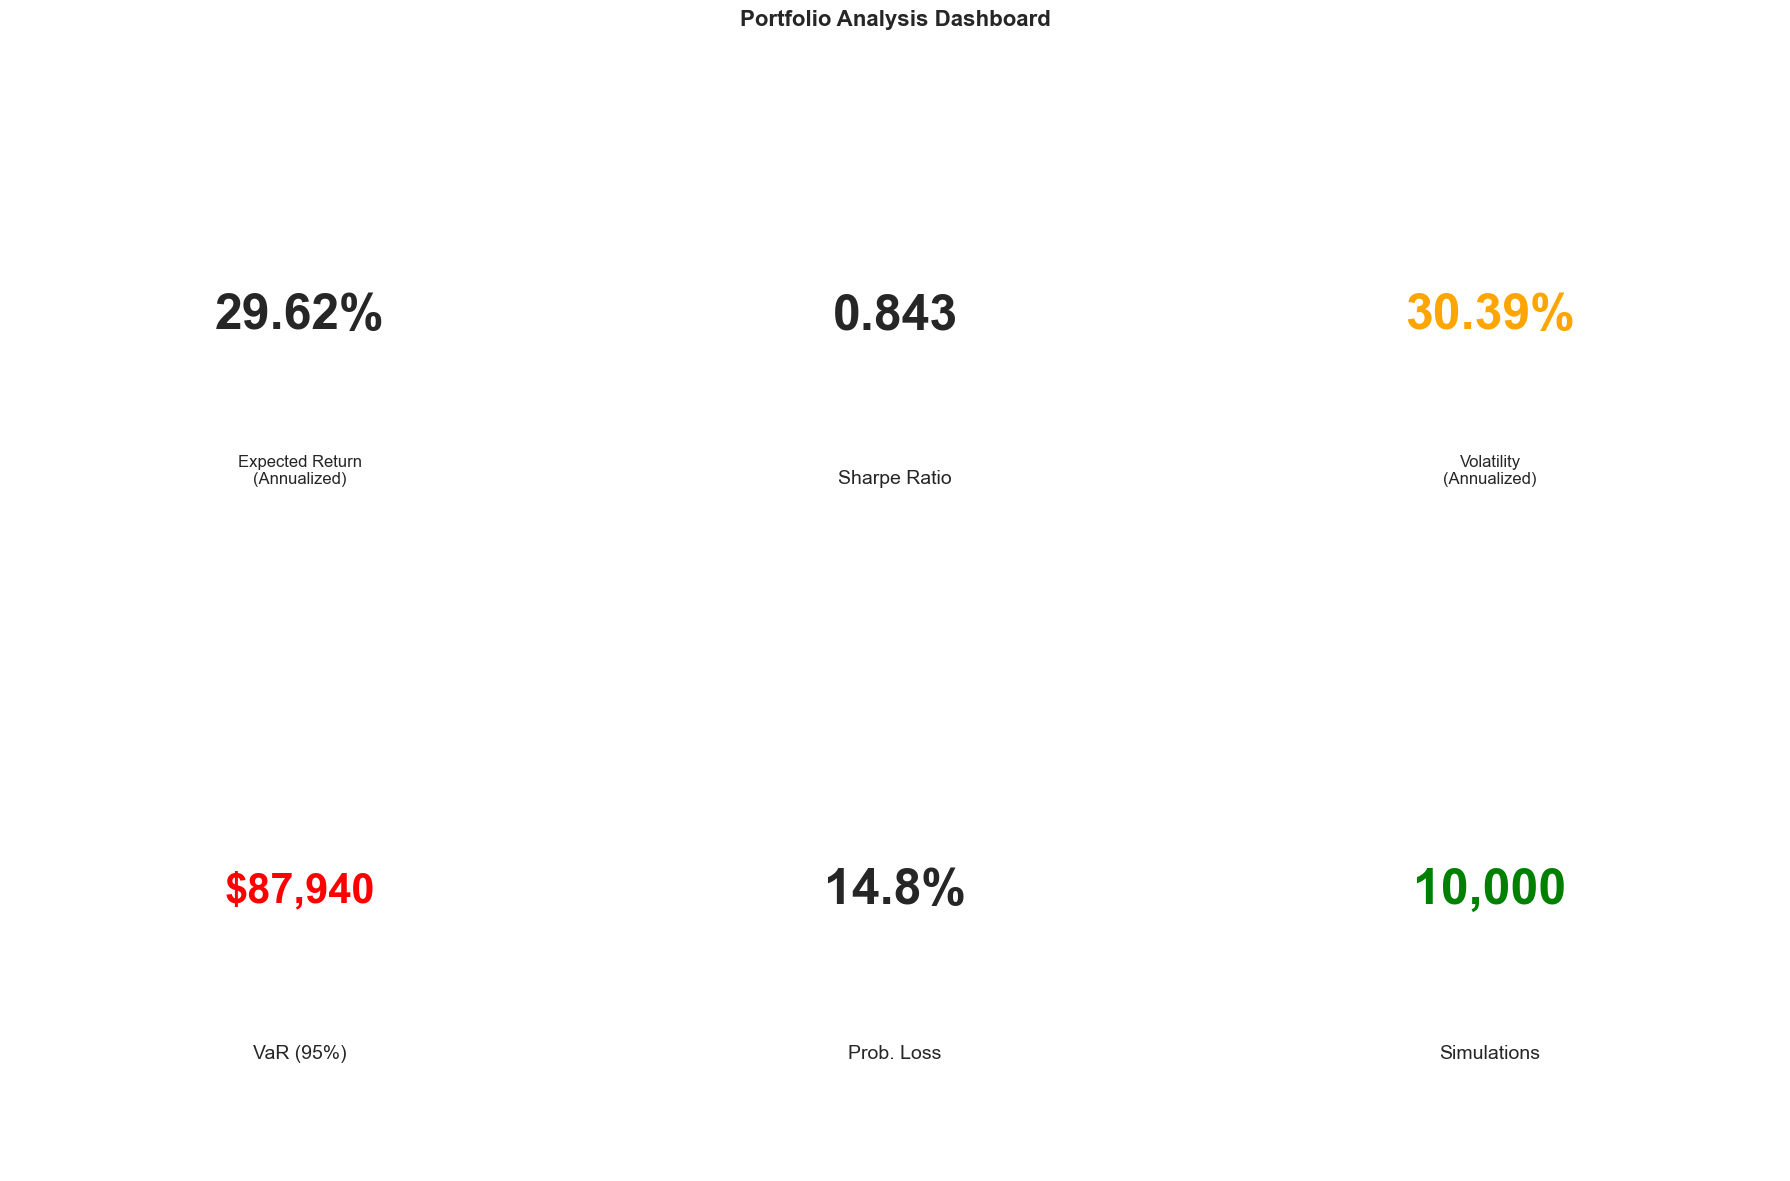

2025-11-07 12:16:50,776 - monte_carlo - INFO - [2/10] Evolución de Precios Históricos...


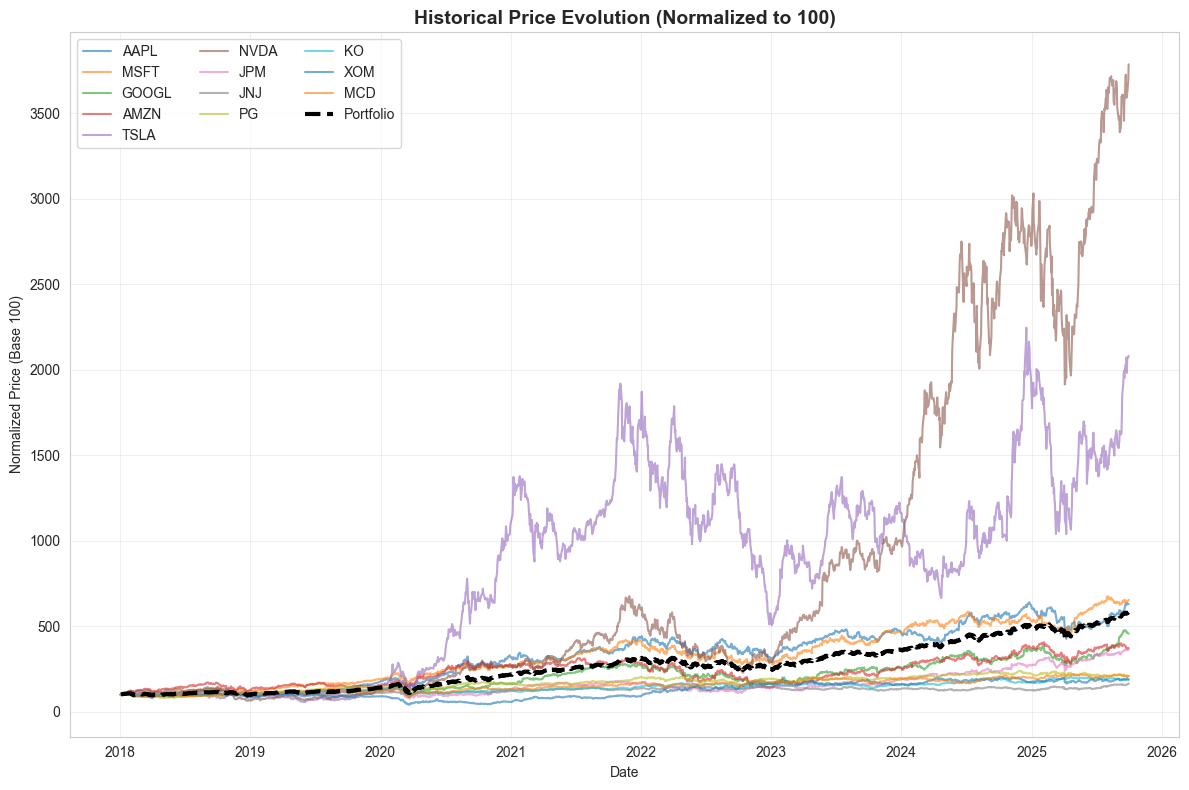

2025-11-07 12:16:51,094 - monte_carlo - INFO - [3/10] Trayectorias Monte Carlo (Fan Chart)...


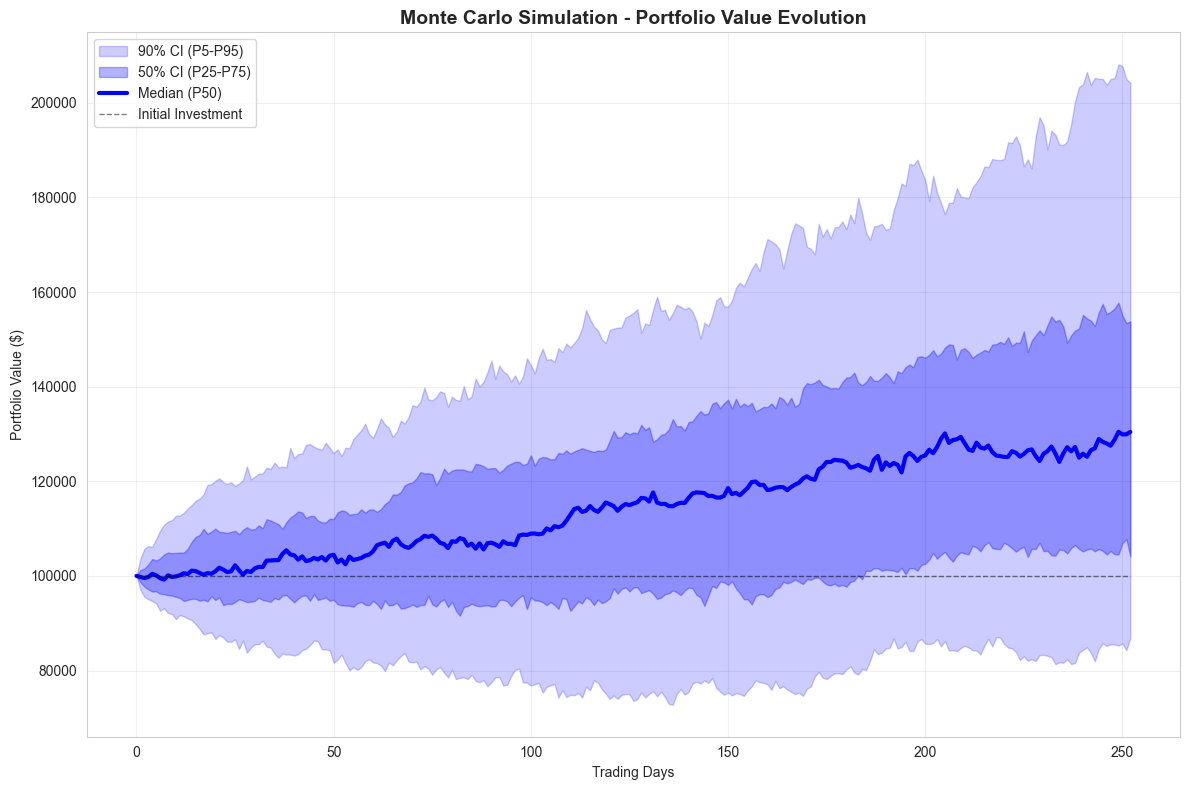

2025-11-07 12:16:51,286 - monte_carlo - INFO - [4/10] Distribución de Valores Finales...


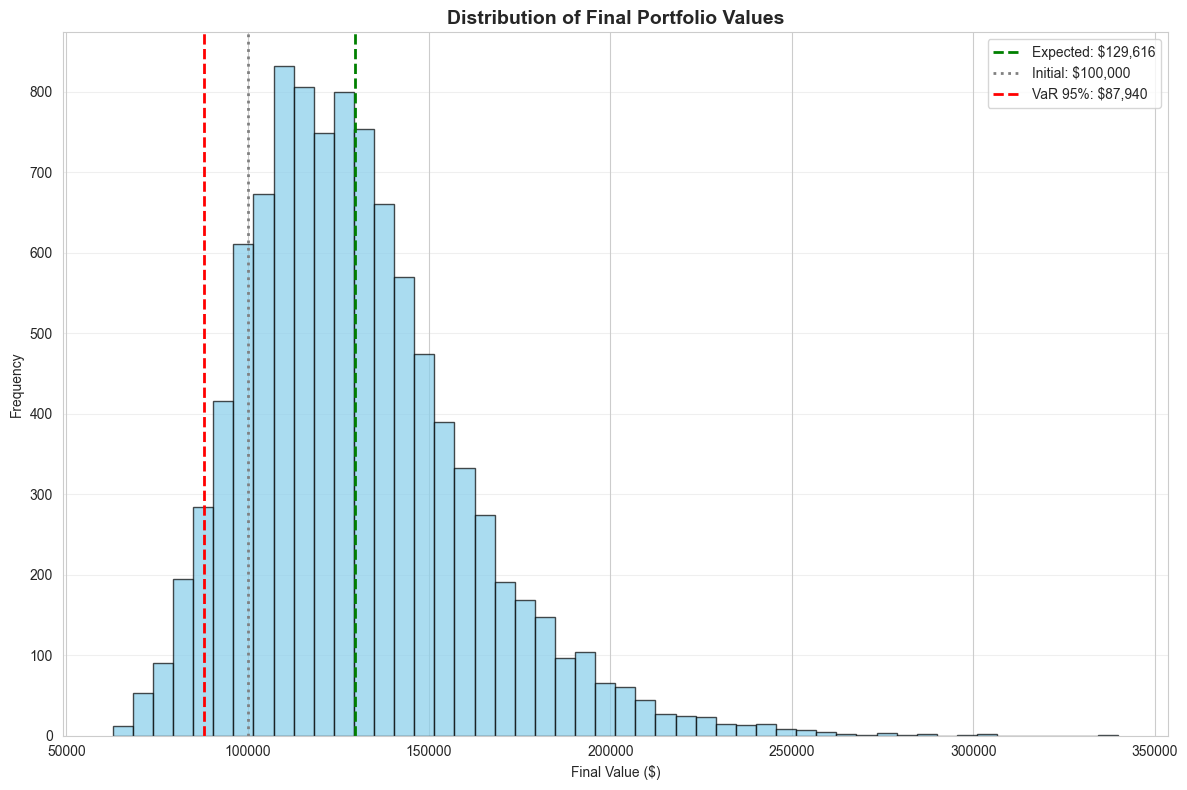

2025-11-07 12:16:51,462 - monte_carlo - INFO - [5/10] Drift de Pesos...


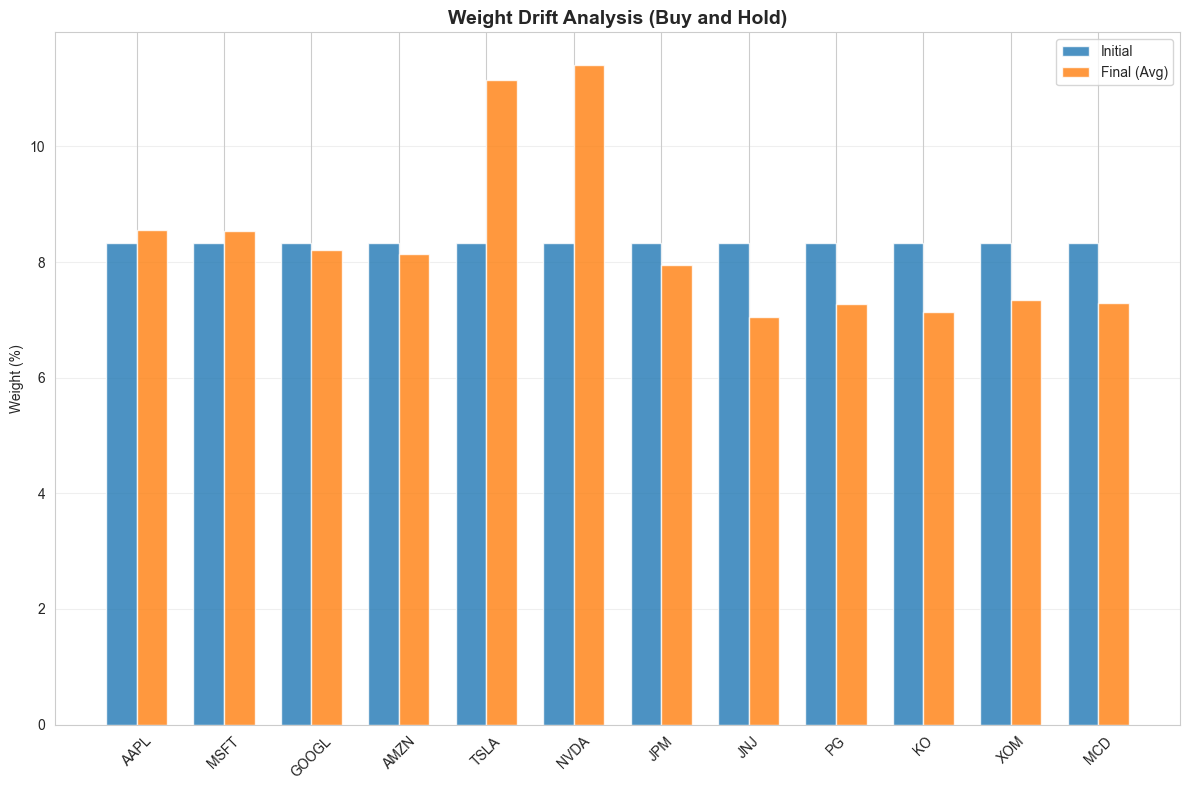

2025-11-07 12:16:51,634 - monte_carlo - INFO - [6/10] Heatmap de Correlaciones...


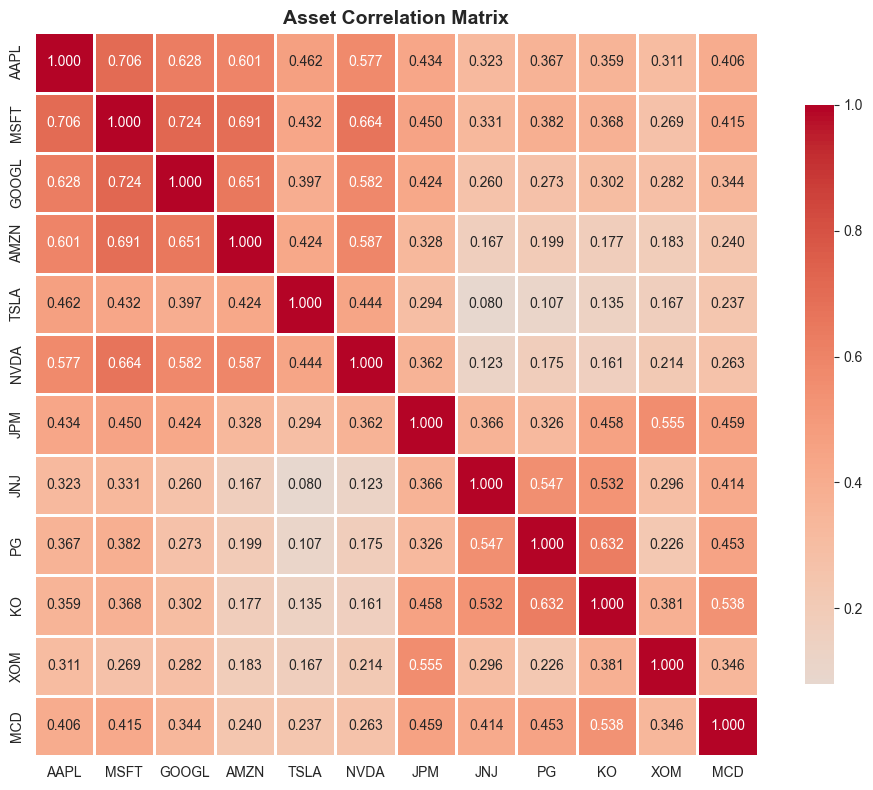

2025-11-07 12:16:51,906 - monte_carlo - INFO - [7/10] Riesgo-Retorno Scatter...


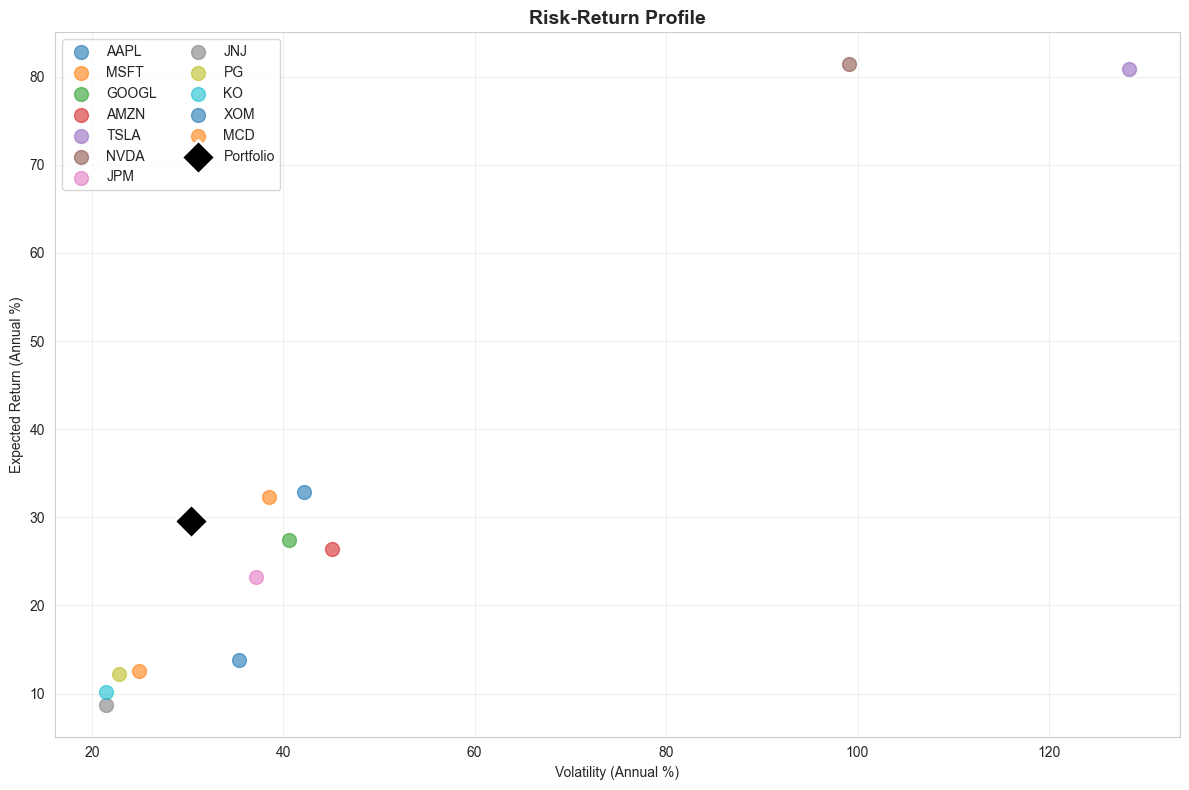

2025-11-07 12:16:52,162 - monte_carlo - INFO - [8/10] Tabla Comparativa...


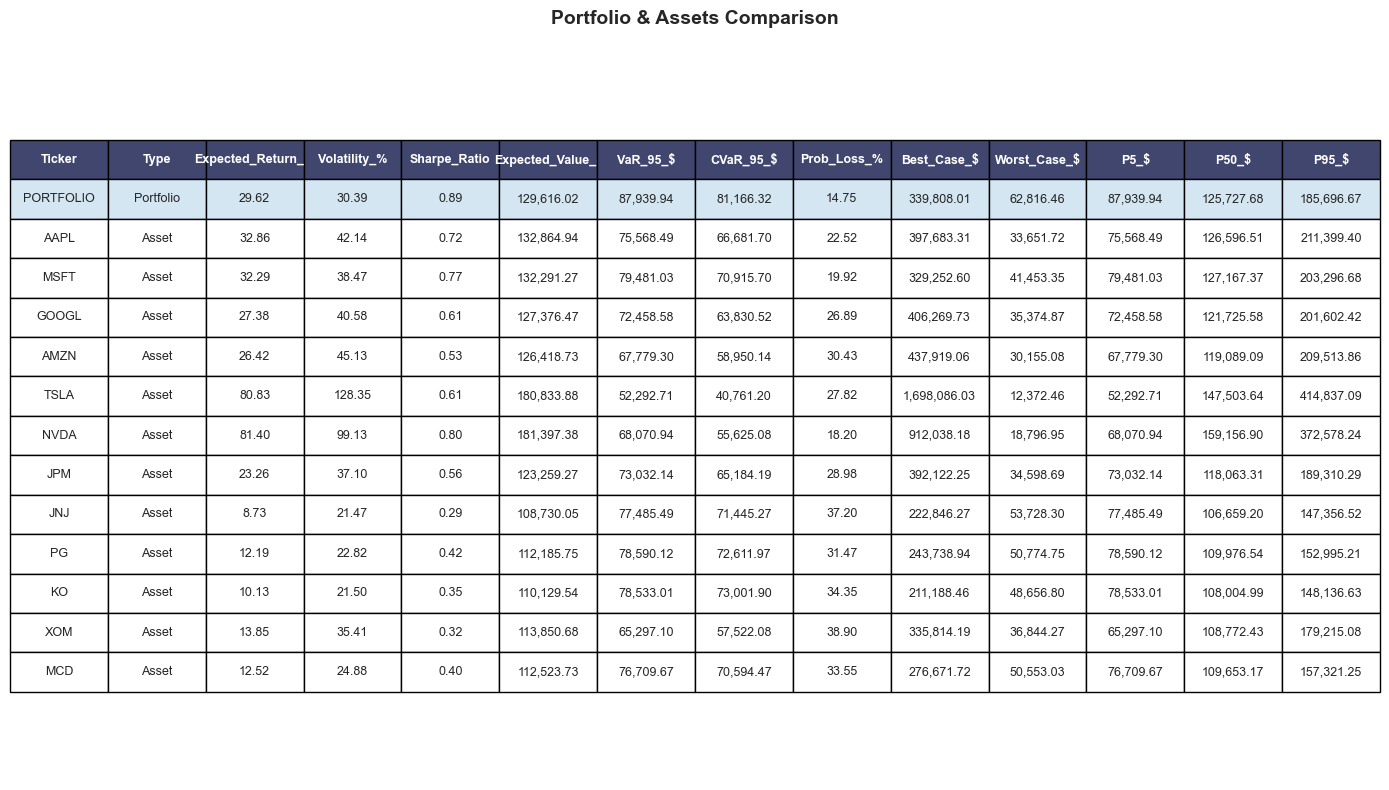

2025-11-07 12:16:52,604 - monte_carlo - INFO - [9/10] Beta Analysis (Riesgo Sistemático)...
2025-11-07 12:16:52,609 - price_series - INFO -   ✓ Betas calculados vs índice de mercado


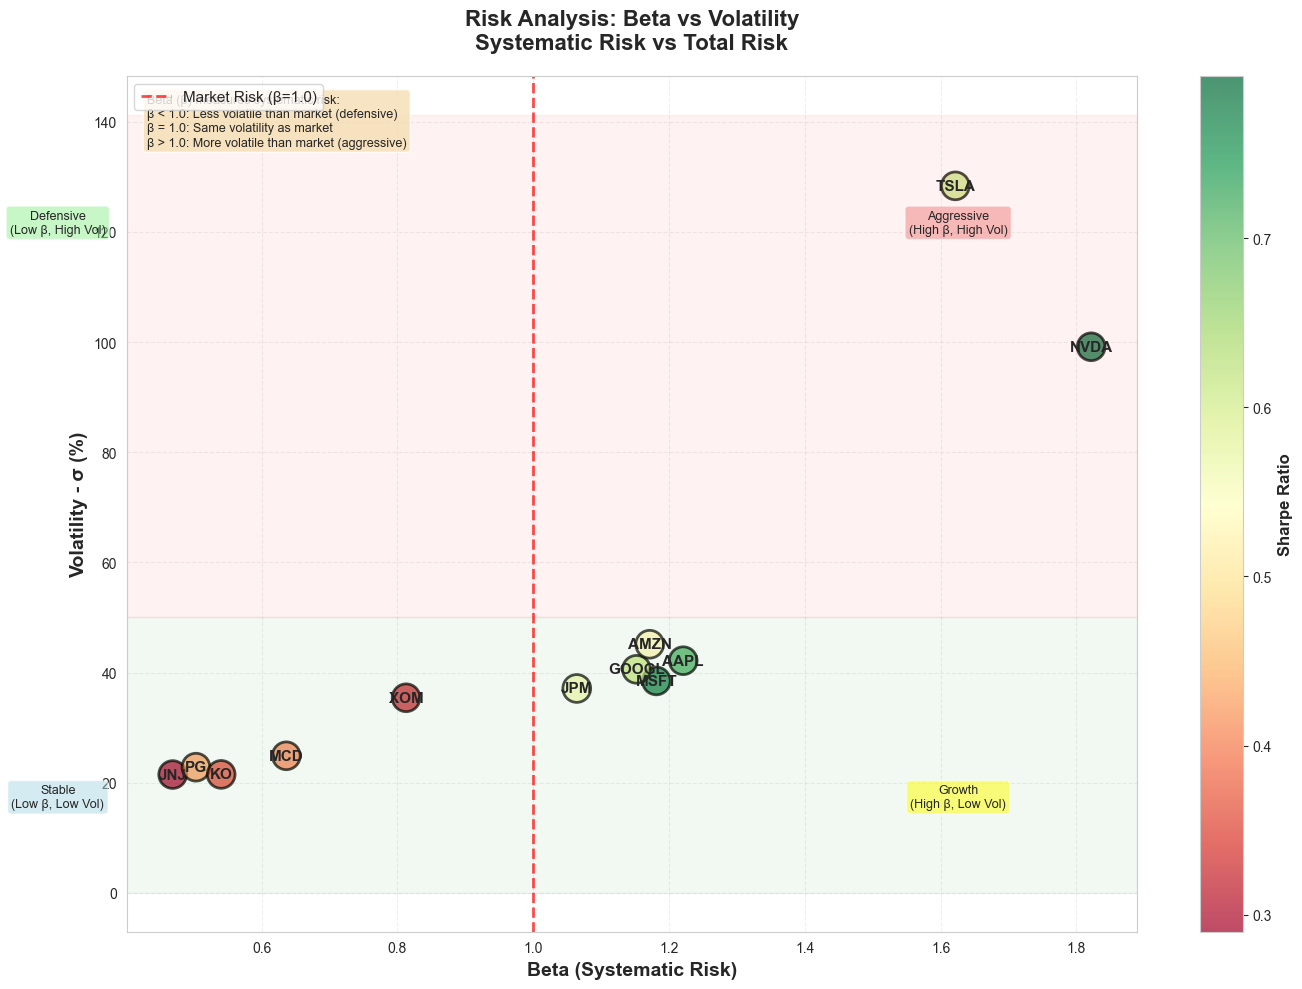

2025-11-07 12:16:52,842 - monte_carlo - INFO - [10/10] Maximum Drawdown...


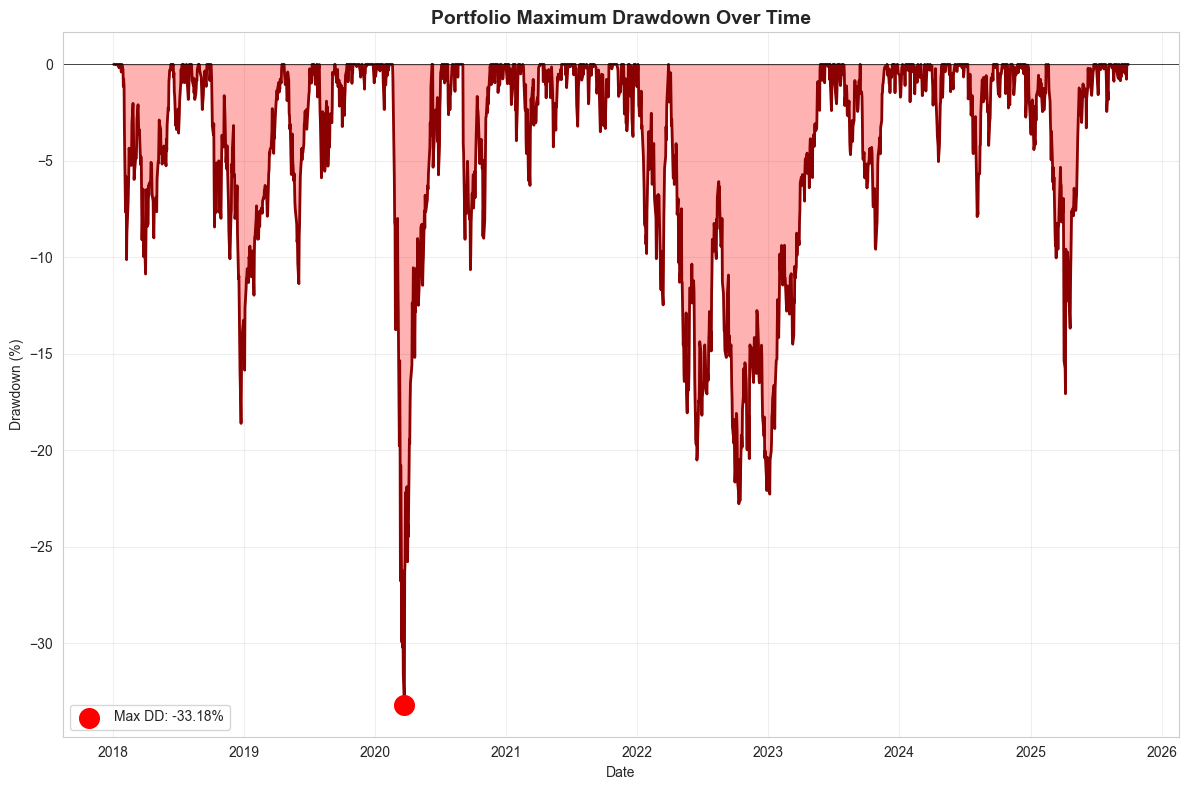

2025-11-07 12:16:53,108 - monte_carlo - INFO - 
✓ Todas las visualizaciones generadas exitosamente
2025-11-07 12:16:53,108 - monte_carlo - INFO - ✓ Gráficos guardados en: portfolio_plots/



✓ Todas las visualizaciones generadas
📁 Guardadas en carpeta: portfolio_plots/


In [9]:
# Generate all plots
print("📊 Generando visualizaciones...")
print("⚠️  Esto puede tomar un momento...\n")

results.plots_report(
    show=True,
    save=True,
    output_dir="portfolio_plots",
    dpi=150
)

print("\n✓ Todas las visualizaciones generadas")
print("📁 Guardadas en carpeta: portfolio_plots/")